In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, f1_score, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, RandomizedSearchCV

In [2]:
dataFrame = pd.read_csv('./Data_for_UCI_named.csv')
dataFrame[:5]

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [3]:
dataFrame.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [4]:
features = dataFrame.drop(['stab', 'stabf'], axis = 1)
target = dataFrame['stabf']

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=.2, random_state=1)

In [5]:
sc = StandardScaler()
x_train = pd.DataFrame(sc.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(sc.transform(x_test), columns=x_test.columns)

In [6]:
print('Answer 1')

round((2*((355/(355 + 1480))*(355/(355 + 45)))/((355/(355 + 1480)) + (355/(355 + 45)))), 4)

Answer 1


0.3177

In [7]:
print('Answer 4\n')

print('Recall '+  str(82 / (82 + 18)))
print('False ' +  str((2 / (2 + 98))))
print('Costs ' + str(5 * 2 + 18))

Answer 4

Recall 0.82
False 0.02
Costs 28


In [8]:
print('Answer 14')

forest_clf = RandomForestClassifier(random_state=1)
forest_clf.fit(x_train, y_train)
forest_pred = forest_clf.predict(x_test)
acc_score = round(accuracy_score(y_test, forest_pred), 4)
acc_score

Answer 14


0.929

In [9]:
print('Answer 15')

xgb_clf = XGBClassifier(random_state=1)
xgb_clf.fit(x_train, y_train)
xgb_pred = xgb_clf.predict(x_test)
acc_score = round(accuracy_score(y_test, xgb_pred), 4)
acc_score

Answer 15
[00:10:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Anuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.9455

In [10]:
print('Answer 16')

lgbm_clf = LGBMClassifier(random_state=1)
lgbm_clf.fit(x_train, y_train)
lgbm_pred = lgbm_clf.predict(x_test)
acc_score = round(accuracy_score(y_test, lgbm_pred), 4)
acc_score

Answer 16


0.9395

In [11]:
print('Answer 17\n')

n_estimators = [50, 100, 300, 500, 1000]

min_samples_split = [2, 3, 5, 7, 9]

min_samples_leaf = [1, 2, 4, 6, 8]

max_features = ['auto', 'sqrt', 'log2', None] 

hyperparameter_grid = {'n_estimators': n_estimators, 'min_samples_leaf': min_samples_leaf, 'min_samples_split': min_samples_split, 'max_features': max_features}

ext_clf = ExtraTreesClassifier(random_state=1)

randomised_grid_search = RandomizedSearchCV(ext_clf, param_distributions= hyperparameter_grid, scoring='accuracy', n_iter=10, cv=5, n_jobs=-1, verbose=1, random_state=1)

randomised_grid_search.fit(x_train, y_train)

randomised_grid_search.best_params_

Answer 17

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_features': None}

In [12]:
print('Answer 18\n')

ext_clf.fit(x_train, y_train)

old_acc_score = round(accuracy_score(y_test, ext_clf.predict(x_test)), 4)
print(old_acc_score)

new_model = randomised_grid_search.best_estimator_

new_model.fit(x_train, y_train)

new_pred = new_model.predict(x_test)

print(round(accuracy_score(y_test, new_pred), 4))


Answer 18

0.928
0.927


Answer 20



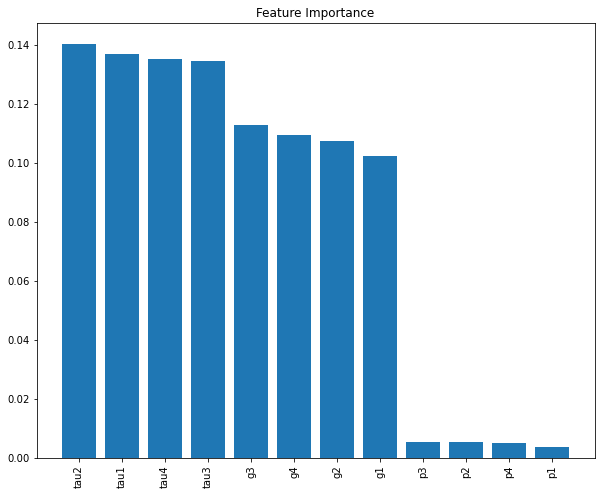

In [13]:
print('Answer 20\n')

feature_importances = new_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]
names = [x_train.columns[i] for i in indices]
plt.figure(figsize=(10, 8))

plt.title("Feature Importance")

plt.bar(range(x_train.shape[1]), feature_importances[indices])

plt.xticks(range(x_train.shape[1]), names, rotation=90)

plt.show()